# Problem Statement
***We need to predict any movie box office collection using machine learning algorithm also we need to do proper feature engineering and selection also handle outliers and null values.***

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datawrang as dw

In [2]:
df1 = pd.read_csv('bollywood_box_clean.csv')
df2 = pd.read_csv('movie_metadata.csv')

In [3]:
df1.head()

,movie_name,movie_opening,movie_weekend,movie_firstweek,movie_total,movie_total_worldwide,movie_genre,movie_director,release_date,release_day,release_month,release_year,runtime,producer,banner,actors,movie_details
0,Angrezi Medium,4.03,9.03,9.36,9.36,13.50,"Drama, Comedy",Homi Adajania,"13 March, 2020",13,Mar,2020,145,"Dinesh Vijan , Jyoti Deshpande","Maddock Films, Jio Studios","Irrfan Khan , Radhika Madan, Kareena Kapoor",When his daughter decides to further her studi...
1,Baaghi 3,17.50,53.83,90.67,93.37,137.00,Action,Ahmed Khan,"06 March, 2020",6,Mar,2020,147,Sajid Nadiadwala,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh",A man embarks on a bloody rampage to save his ...
2,Thappad,3.07,14.66,22.79,30.61,44.50,"Drama, Social",Anubhav Sinha,"28 February, 2020",28,Feb,2020,142,"Bhushan Kumar , Krishan Kumar, Anubhav Sinha","Benaras Media Works, T-Series Super Cassettes...","Taapsee Pannu , Pavail Gulati, Dia Mirza",Thappad is a story of Amrita whose seemingly p...
3,Shubh Mangal Zyada Saavdhan,9.55,32.66,44.84,62.78,86.39,"Comedy, Romance",Hitesh Kewalya,"21 February, 2020",21,Feb,2020,120,"Aanand L Rai , Himanshu Sharma, Bhushan Kumar","Colour Yellow Productions Pvt Ltd, T-Series S...","Ayushman Khurana , Jitendra Kumar, Gajraj Rao",The road to achieving a happy ending is a litt...
4,Bhoot: Part One - The Haunted Ship,5.10,16.36,24.18,31.97,40.94,Horror,Bhanu Pratap Singh,"21 February, 2020",21,Feb,2020,117,"Hiroo Johar , Karan Johar, Apoorva Mehta","Dharma Productions, Zee Studios","Vicky Kaushal , Bhumi Pednekar, Ashutosh Rana",A couple is trapped on an abandoned ship lying...


In [4]:
df2.head() #This is our hollywood dataset

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
print(df1.shape)
print(df2.shape)

(130, 17)
(5043, 28)


In [6]:
df2.country.value_counts()

USA              3807
UK                448
France            154
Canada            126
Germany            97
                 ... 
Slovakia            1
Chile               1
Cambodia            1
Official site       1
Philippines         1
Name: country, Length: 65, dtype: int64

In [7]:
df1.columns

Index(['movie_name', 'movie_opening', 'movie_weekend', 'movie_firstweek',
       'movie_total', 'movie_total_worldwide', 'movie_genre', 'movie_director',
       'release_date', 'release_day', 'release_month', 'release_year',
       'runtime', 'producer', 'banner', 'actors', 'movie_details'],
      dtype='object')

In [8]:
df1.drop(['movie_name', 'movie_opening', 'movie_weekend', 'movie_firstweek',
       'movie_total','movie_details','release_date'], axis = 1, inplace = True)

In [9]:
df1.head() #dropped columns

,movie_total_worldwide,movie_genre,movie_director,release_day,release_month,release_year,runtime,producer,banner,actors
0,13.50,"Drama, Comedy",Homi Adajania,13,Mar,2020,145,"Dinesh Vijan , Jyoti Deshpande","Maddock Films, Jio Studios","Irrfan Khan , Radhika Madan, Kareena Kapoor"
1,137.00,Action,Ahmed Khan,6,Mar,2020,147,Sajid Nadiadwala,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh"
2,44.50,"Drama, Social",Anubhav Sinha,28,Feb,2020,142,"Bhushan Kumar , Krishan Kumar, Anubhav Sinha","Benaras Media Works, T-Series Super Cassettes...","Taapsee Pannu , Pavail Gulati, Dia Mirza"
3,86.39,"Comedy, Romance",Hitesh Kewalya,21,Feb,2020,120,"Aanand L Rai , Himanshu Sharma, Bhushan Kumar","Colour Yellow Productions Pvt Ltd, T-Series S...","Ayushman Khurana , Jitendra Kumar, Gajraj Rao"
4,40.94,Horror,Bhanu Pratap Singh,21,Feb,2020,117,"Hiroo Johar , Karan Johar, Apoorva Mehta","Dharma Productions, Zee Studios","Vicky Kaushal , Bhumi Pednekar, Ashutosh Rana"


In [10]:
df2.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [11]:
df2.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [12]:
df2.drop(['color', 'num_critic_for_reviews','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','movie_title', 'num_voted_users', 'cast_total_facebook_likes','facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews','content_rating', 'budget', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],axis = 1, inplace = True) #dropping all other features.

In [13]:
df2.head()

,director_name,duration,actor_2_name,gross,genres,actor_1_name,actor_3_name,language,country,title_year
0,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Wes Studi,English,USA,2009.0
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Jack Davenport,English,USA,2007.0
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Stephanie Sigman,English,UK,2015.0
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0
4,Doug Walker,NaN,Rob Walker,NaN,Documentary,Doug Walker,NaN,NaN,NaN,NaN


In [14]:
df1.drop('producer', axis = 1 , inplace = True)

In [15]:
df1.head()

,movie_total_worldwide,movie_genre,movie_director,release_day,release_month,release_year,runtime,banner,actors
0,13.50,"Drama, Comedy",Homi Adajania,13,Mar,2020,145,"Maddock Films, Jio Studios","Irrfan Khan , Radhika Madan, Kareena Kapoor"
1,137.00,Action,Ahmed Khan,6,Mar,2020,147,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh"
2,44.50,"Drama, Social",Anubhav Sinha,28,Feb,2020,142,"Benaras Media Works, T-Series Super Cassettes...","Taapsee Pannu , Pavail Gulati, Dia Mirza"
3,86.39,"Comedy, Romance",Hitesh Kewalya,21,Feb,2020,120,"Colour Yellow Productions Pvt Ltd, T-Series S...","Ayushman Khurana , Jitendra Kumar, Gajraj Rao"
4,40.94,Horror,Bhanu Pratap Singh,21,Feb,2020,117,"Dharma Productions, Zee Studios","Vicky Kaushal , Bhumi Pednekar, Ashutosh Rana"


In [16]:
df2.head()

,director_name,duration,actor_2_name,gross,genres,actor_1_name,actor_3_name,language,country,title_year
0,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Wes Studi,English,USA,2009.0
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Jack Davenport,English,USA,2007.0
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Stephanie Sigman,English,UK,2015.0
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0
4,Doug Walker,NaN,Rob Walker,NaN,Documentary,Doug Walker,NaN,NaN,NaN,NaN


In [17]:
df2.rename(columns = {'director_name': 'Director','gross':'Boxoffice','title_year': 'year'}, inplace = True)

In [18]:
df1.rename(columns = {'movie_total_worldwide': 'Boxoffice','movie_genre': 'genres', 'runtime': 'duration'}, inplace = True)

In [19]:
df1.rename(columns = {'movie_director': 'Director','release_year': 'year'}, inplace = True)

In [20]:
df1.head()

,Boxoffice,genres,Director,release_day,release_month,year,duration,banner,actors
0,13.50,"Drama, Comedy",Homi Adajania,13,Mar,2020,145,"Maddock Films, Jio Studios","Irrfan Khan , Radhika Madan, Kareena Kapoor"
1,137.00,Action,Ahmed Khan,6,Mar,2020,147,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh"
2,44.50,"Drama, Social",Anubhav Sinha,28,Feb,2020,142,"Benaras Media Works, T-Series Super Cassettes...","Taapsee Pannu , Pavail Gulati, Dia Mirza"
3,86.39,"Comedy, Romance",Hitesh Kewalya,21,Feb,2020,120,"Colour Yellow Productions Pvt Ltd, T-Series S...","Ayushman Khurana , Jitendra Kumar, Gajraj Rao"
4,40.94,Horror,Bhanu Pratap Singh,21,Feb,2020,117,"Dharma Productions, Zee Studios","Vicky Kaushal , Bhumi Pednekar, Ashutosh Rana"


In [21]:
df2.head()

,Director,duration,actor_2_name,Boxoffice,genres,actor_1_name,actor_3_name,language,country,year
0,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Wes Studi,English,USA,2009.0
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Jack Davenport,English,USA,2007.0
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Stephanie Sigman,English,UK,2015.0
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0
4,Doug Walker,NaN,Rob Walker,NaN,Documentary,Doug Walker,NaN,NaN,NaN,NaN


In [22]:
df2.genres.value_counts()

Drama                                         236
Comedy                                        209
Comedy|Drama                                  191
Comedy|Drama|Romance                          187
Comedy|Romance                                158
                                             ... 
Crime|Drama|Mystery|Sci-Fi|Thriller             1
Adventure|Comedy|Crime|Drama                    1
Action|Crime|Drama|Mystery|Sci-Fi|Thriller      1
Action|Drama|Fantasy|Horror|Thriller            1
Comedy|Crime|Horror                             1
Name: genres, Length: 914, dtype: int64

In [23]:
# Lets create new features. For hollywood
genre1 = df2.genres.str.split('|').str[0]
genre2 = df2.genres.str.split('|').str[1]
genre3 = df2.genres.str.split('|').str[2]

In [24]:
print(f'genere1 :- \n {genre1}')
print(f'genere2 :- \n {genre2}')
print(f'genere3 :- \n {genre3}')

genere1 :- 
 0            Action
1            Action
2            Action
3            Action
4       Documentary
           ...     
5038         Comedy
5039          Crime
5040          Drama
5041         Comedy
5042    Documentary
Name: genres, Length: 5043, dtype: object
genere2 :- 
 0       Adventure
1       Adventure
2       Adventure
3        Thriller
4             NaN
          ...    
5038        Drama
5039        Drama
5040       Horror
5041        Drama
5042          NaN
Name: genres, Length: 5043, dtype: object
genere3 :- 
 0        Fantasy
1        Fantasy
2       Thriller
3            NaN
4            NaN
          ...   
5038         NaN
5039     Mystery
5040    Thriller
5041     Romance
5042         NaN
Name: genres, Length: 5043, dtype: object


In [25]:
df2['genere1'] = genre1
df2['genere2'] = genre2

In [26]:
df2.head()

,Director,duration,actor_2_name,Boxoffice,genres,actor_1_name,actor_3_name,language,country,year,genere1,genere2
0,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Wes Studi,English,USA,2009.0,Action,Adventure
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Jack Davenport,English,USA,2007.0,Action,Adventure
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Stephanie Sigman,English,UK,2015.0,Action,Adventure
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0,Action,Thriller
4,Doug Walker,NaN,Rob Walker,NaN,Documentary,Doug Walker,NaN,NaN,NaN,NaN,Documentary,NaN


In [27]:
# Lets create new features. For Bollywood
genre1 = df1.genres.str.split(',').str[0]
genre2 = df1.genres.str.split(',').str[1]
genre3 = df1.genres.str.split(',').str[2]

In [28]:
df1['genere1'] = genre1
df1['genere2'] = genre2

In [29]:
# Lets create new features. For Hollywoood and Bollywood
actor_1_name= df1.actors.str.split(',').str[0]
actor_2_name = df1.actors.str.split(',').str[1]
actor_3_name = df1.actors.str.split(',').str[2]
df1['actor_1_name'] = actor_1_name
df1['actor_2_name'] = actor_2_name
df1['actor_3_name'] = actor_3_name

In [30]:
#dropping other unecessary features.
df1.drop(['genres','release_day','release_month','banner','actors'], axis = 1, inplace = True)
df2.drop(['genres'], axis = 1, inplace = True)


In [31]:
df1.head() 

,Boxoffice,Director,year,duration,genere1,genere2,actor_1_name,actor_2_name,actor_3_name
0,13.50,Homi Adajania,2020,145,Drama,Comedy,Irrfan Khan,Radhika Madan,Kareena Kapoor
1,137.00,Ahmed Khan,2020,147,Action,NaN,Tiger Shroff,Shraddha Kapoor,Riteish Deshmukh
2,44.50,Anubhav Sinha,2020,142,Drama,Social,Taapsee Pannu,Pavail Gulati,Dia Mirza
3,86.39,Hitesh Kewalya,2020,120,Comedy,Romance,Ayushman Khurana,Jitendra Kumar,Gajraj Rao
4,40.94,Bhanu Pratap Singh,2020,117,Horror,NaN,Vicky Kaushal,Bhumi Pednekar,Ashutosh Rana


In [32]:
df2.head()

,Director,duration,actor_2_name,Boxoffice,actor_1_name,actor_3_name,language,country,year,genere1,genere2
0,James Cameron,178.0,Joel David Moore,760505847.0,CCH Pounder,Wes Studi,English,USA,2009.0,Action,Adventure
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Johnny Depp,Jack Davenport,English,USA,2007.0,Action,Adventure
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Christoph Waltz,Stephanie Sigman,English,UK,2015.0,Action,Adventure
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0,Action,Thriller
4,Doug Walker,NaN,Rob Walker,NaN,Doug Walker,NaN,NaN,NaN,NaN,Documentary,NaN


# Lets create new features

In [33]:
df2.head() # As you can see we have features like country and language which are not present in our bollywood dataset we will add that

,Director,duration,actor_2_name,Boxoffice,actor_1_name,actor_3_name,language,country,year,genere1,genere2
0,James Cameron,178.0,Joel David Moore,760505847.0,CCH Pounder,Wes Studi,English,USA,2009.0,Action,Adventure
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Johnny Depp,Jack Davenport,English,USA,2007.0,Action,Adventure
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Christoph Waltz,Stephanie Sigman,English,UK,2015.0,Action,Adventure
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0,Action,Thriller
4,Doug Walker,NaN,Rob Walker,NaN,Doug Walker,NaN,NaN,NaN,NaN,Documentary,NaN


In [34]:
df1['country'] = 'IN'
df1['language'] = 'Hindi'

In [35]:
df1.head() #Bollywood Dataset

,Boxoffice,Director,year,duration,genere1,genere2,actor_1_name,actor_2_name,actor_3_name,country,language
0,13.50,Homi Adajania,2020,145,Drama,Comedy,Irrfan Khan,Radhika Madan,Kareena Kapoor,IN,Hindi
1,137.00,Ahmed Khan,2020,147,Action,NaN,Tiger Shroff,Shraddha Kapoor,Riteish Deshmukh,IN,Hindi
2,44.50,Anubhav Sinha,2020,142,Drama,Social,Taapsee Pannu,Pavail Gulati,Dia Mirza,IN,Hindi
3,86.39,Hitesh Kewalya,2020,120,Comedy,Romance,Ayushman Khurana,Jitendra Kumar,Gajraj Rao,IN,Hindi
4,40.94,Bhanu Pratap Singh,2020,117,Horror,NaN,Vicky Kaushal,Bhumi Pednekar,Ashutosh Rana,IN,Hindi


In [36]:
df2.head() #hollywood Dataset

,Director,duration,actor_2_name,Boxoffice,actor_1_name,actor_3_name,language,country,year,genere1,genere2
0,James Cameron,178.0,Joel David Moore,760505847.0,CCH Pounder,Wes Studi,English,USA,2009.0,Action,Adventure
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Johnny Depp,Jack Davenport,English,USA,2007.0,Action,Adventure
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Christoph Waltz,Stephanie Sigman,English,UK,2015.0,Action,Adventure
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0,Action,Thriller
4,Doug Walker,NaN,Rob Walker,NaN,Doug Walker,NaN,NaN,NaN,NaN,Documentary,NaN


## Day 2 

# LETS DO EDA

In [37]:
dfbolly = df1
dfholly = df2

In [38]:
dfholly['Boxoffice'] = dfholly['Boxoffice']/10000000 # to convert values into 10 million format or 1crore.

In [39]:
final_df = pd.concat([dfholly,dfbolly], ignore_index = True, axis = 0)

In [40]:
final_df['country'].value_counts()

USA              3807
UK                448
France            154
IN                130
Canada            126
                 ... 
Official site       1
Soviet Union        1
Chile               1
Peru                1
Panama              1
Name: country, Length: 66, dtype: int64

# Handle Missing Values

In [41]:
final_df.isnull().mean() #percentage of missing value 

Director        0.020104
duration        0.002900
actor_2_name    0.003480
Boxoffice       0.170887
actor_1_name    0.002126
actor_3_name    0.005799
language        0.002320
country         0.000967
year            0.020878
genere1         0.000193
genere2         0.134351
dtype: float64

<AxesSubplot:>

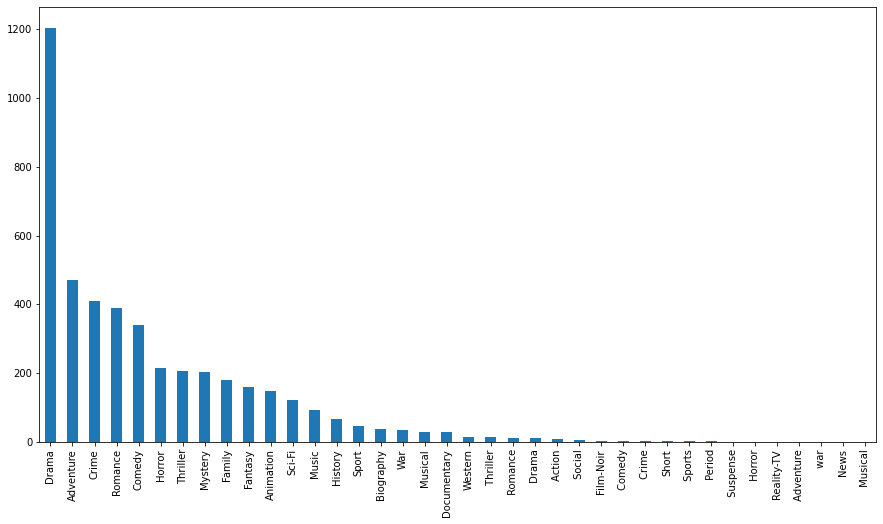

In [42]:
fig = plt.subplots(figsize=(15,8))
final_df['genere2'].value_counts().plot(kind = 'bar')

In [43]:
dw.Capture_NaN(dataframe = final_df, feature = 'genere2')

,Director,duration,actor_2_name,Boxoffice,actor_1_name,actor_3_name,language,country,year,genere1,genere2,genere2_Capture
0,James Cameron,178.0,Joel David Moore,76.050585,CCH Pounder,Wes Studi,English,USA,2009.0,Action,Adventure,0
1,Gore Verbinski,169.0,Orlando Bloom,30.940415,Johnny Depp,Jack Davenport,English,USA,2007.0,Action,Adventure,0
2,Sam Mendes,148.0,Rory Kinnear,20.007417,Christoph Waltz,Stephanie Sigman,English,UK,2015.0,Action,Adventure,0
3,Christopher Nolan,164.0,Christian Bale,44.813064,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0,Action,Thriller,0
4,Doug Walker,NaN,Rob Walker,NaN,Doug Walker,NaN,NaN,NaN,NaN,Documentary,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5168,Omung Kumar,135.0,Aditi Rao Hydari,15.680000,Sanjay Dutt,Sharad Kelkar,Hindi,IN,2017.0,Drama,NaN,1
5169,Apoorva Lakhia,124.0,Siddhanth Kapoor,9.000000,Shraddha Kapoor,Ankur Bhatia,Hindi,IN,2017.0,Biographical,Crime,0
5170,Ranjit Tiwari,147.0,Diana Penty,16.950000,Farhan Akhtar,Deepak Dobriyal,Hindi,IN,2017.0,Thriller,NaN,1
5171,Hansal Mehta,124.0,Sohum Shah,27.690000,Kangana Ranaut,Rupinder Nagra,Hindi,IN,2017.0,Drama,NaN,1


In [44]:
final_df

,Director,duration,actor_2_name,Boxoffice,actor_1_name,actor_3_name,language,country,year,genere1,genere2,genere2_Capture
0,James Cameron,178.0,Joel David Moore,76.050585,CCH Pounder,Wes Studi,English,USA,2009.0,Action,Adventure,0
1,Gore Verbinski,169.0,Orlando Bloom,30.940415,Johnny Depp,Jack Davenport,English,USA,2007.0,Action,Adventure,0
2,Sam Mendes,148.0,Rory Kinnear,20.007417,Christoph Waltz,Stephanie Sigman,English,UK,2015.0,Action,Adventure,0
3,Christopher Nolan,164.0,Christian Bale,44.813064,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0,Action,Thriller,0
4,Doug Walker,NaN,Rob Walker,NaN,Doug Walker,NaN,NaN,NaN,NaN,Documentary,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5168,Omung Kumar,135.0,Aditi Rao Hydari,15.680000,Sanjay Dutt,Sharad Kelkar,Hindi,IN,2017.0,Drama,NaN,1
5169,Apoorva Lakhia,124.0,Siddhanth Kapoor,9.000000,Shraddha Kapoor,Ankur Bhatia,Hindi,IN,2017.0,Biographical,Crime,0
5170,Ranjit Tiwari,147.0,Diana Penty,16.950000,Farhan Akhtar,Deepak Dobriyal,Hindi,IN,2017.0,Thriller,NaN,1
5171,Hansal Mehta,124.0,Sohum Shah,27.690000,Kangana Ranaut,Rupinder Nagra,Hindi,IN,2017.0,Drama,NaN,1


In [45]:
final_df['genere2'].fillna('Missing',inplace = True) # replacing All NaN values in genere2 with 'MISSING'

In [46]:
final_df.isnull().mean() #after removing null values

Director           0.020104
duration           0.002900
actor_2_name       0.003480
Boxoffice          0.170887
actor_1_name       0.002126
actor_3_name       0.005799
language           0.002320
country            0.000967
year               0.020878
genere1            0.000193
genere2            0.000000
genere2_Capture    0.000000
dtype: float64

In [47]:
final_df.dropna(inplace = True)

In [48]:
final_df.isnull().sum()

Director           0
duration           0
actor_2_name       0
Boxoffice          0
actor_1_name       0
actor_3_name       0
language           0
country            0
year               0
genere1            0
genere2            0
genere2_Capture    0
dtype: int64

In [49]:
final_df.shape

(4260, 12)

In [50]:
final_df['year'].sort_values(ascending = False).unique()

array([2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013., 2012.,
       2011., 2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003.,
       2002., 2001., 2000., 1999., 1998., 1997., 1996., 1995., 1994.,
       1993., 1992., 1991., 1990., 1989., 1988., 1987., 1986., 1985.,
       1984., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1969., 1968., 1967.,
       1966., 1965., 1964., 1963., 1962., 1961., 1960., 1959., 1957.,
       1954., 1953., 1952., 1950., 1948., 1947., 1946., 1942., 1940.,
       1939., 1937., 1936., 1935., 1933., 1929., 1927.])

<AxesSubplot:>

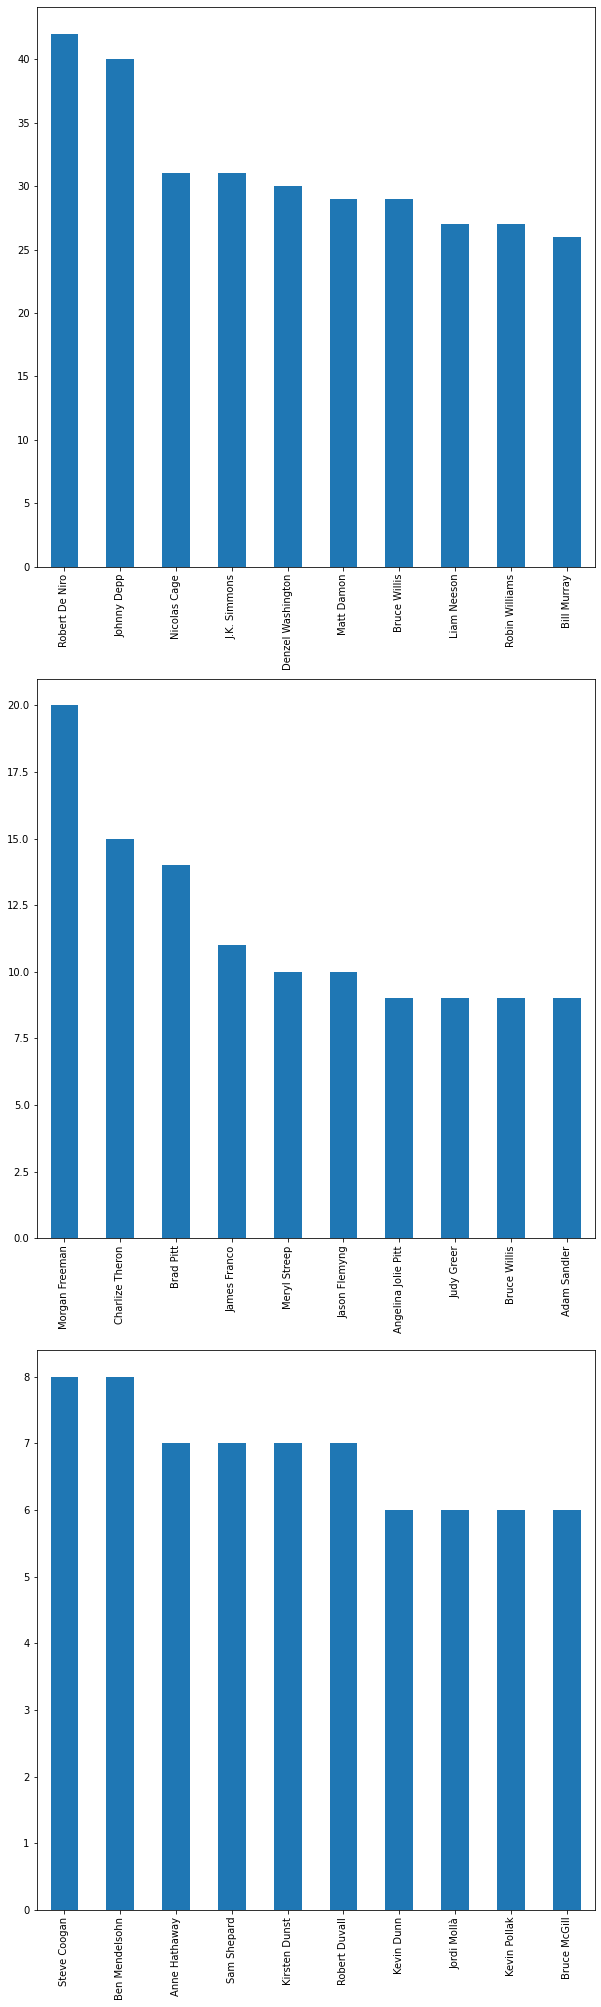

In [51]:
fig, ax = plt.subplots(3,1, figsize = (10,35))
#Value Counts
final_df['actor_1_name'].value_counts()[:10].plot(kind = 'bar', ax = ax[0])
final_df['actor_2_name'].value_counts()[:10].plot(kind = 'bar', ax = ax[1])
final_df['actor_3_name'].value_counts()[:10].plot(kind = 'bar', ax = ax[2])


<AxesSubplot:>

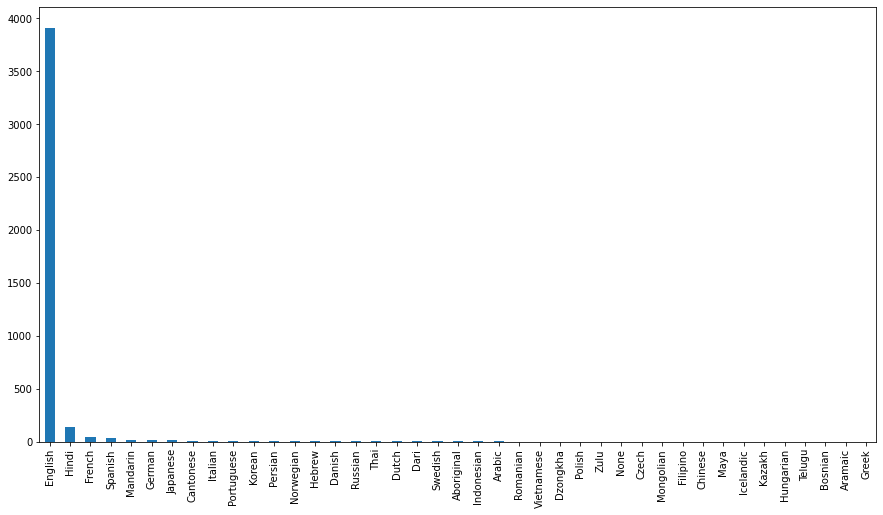

In [52]:
fig = plt.subplots(figsize = (15,8))
final_df['language'].value_counts().plot(kind = 'bar')

In [53]:
final_df.language.value_counts()

English       3913
Hindi          143
French          48
Spanish         30
Mandarin        18
German          15
Japanese        12
Cantonese       10
Italian          7
Portuguese       6
Korean           6
Persian          4
Norwegian        4
Hebrew           4
Danish           3
Russian          3
Thai             3
Dutch            3
Dari             2
Swedish          2
Aboriginal       2
Indonesian       2
Arabic           2
Romanian         1
Vietnamese       1
Dzongkha         1
Polish           1
Zulu             1
None             1
Czech            1
Mongolian        1
Filipino         1
Chinese          1
Maya             1
Icelandic        1
Kazakh           1
Hungarian        1
Telugu           1
Bosnian          1
Aramaic          1
Greek            1
Name: language, dtype: int64

In [54]:
final_df.head()

,Director,duration,actor_2_name,Boxoffice,actor_1_name,actor_3_name,language,country,year,genere1,genere2,genere2_Capture
0,James Cameron,178.0,Joel David Moore,76.050585,CCH Pounder,Wes Studi,English,USA,2009.0,Action,Adventure,0
1,Gore Verbinski,169.0,Orlando Bloom,30.940415,Johnny Depp,Jack Davenport,English,USA,2007.0,Action,Adventure,0
2,Sam Mendes,148.0,Rory Kinnear,20.007417,Christoph Waltz,Stephanie Sigman,English,UK,2015.0,Action,Adventure,0
3,Christopher Nolan,164.0,Christian Bale,44.813064,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0,Action,Thriller,0
5,Andrew Stanton,132.0,Samantha Morton,7.305868,Daryl Sabara,Polly Walker,English,USA,2012.0,Action,Adventure,0


<AxesSubplot:xlabel='genere1', ylabel='Boxoffice'>

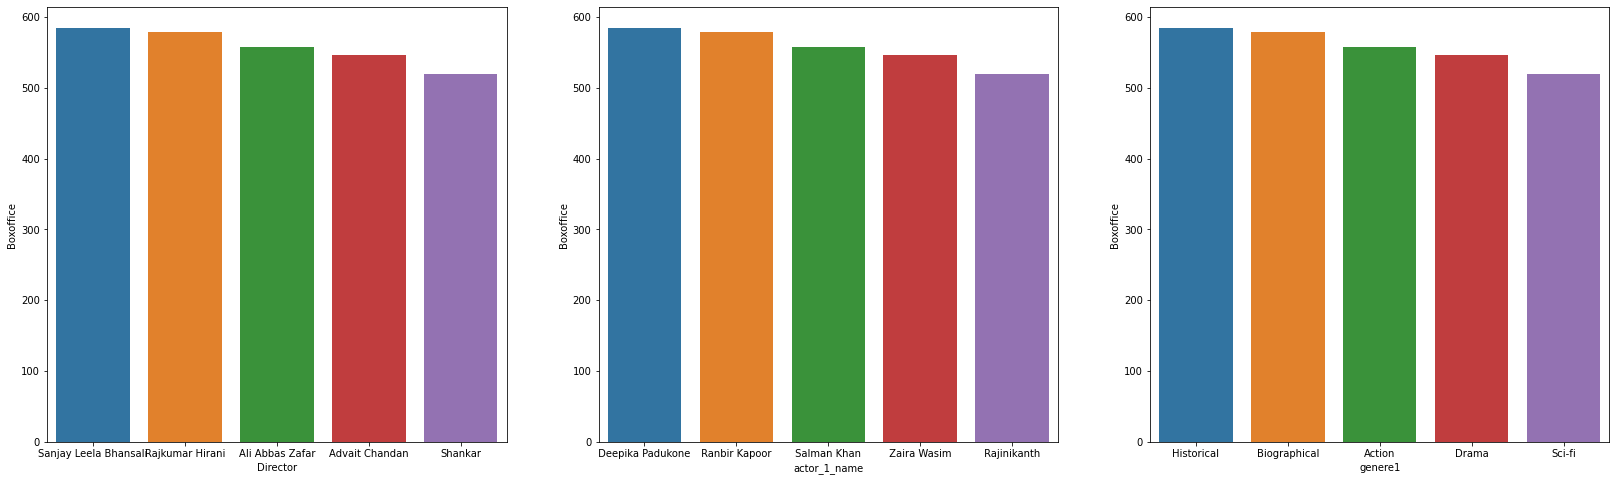

In [55]:
fig, ax = plt.subplots(1,3, figsize = (28,8))
sns.barplot(x = 'Director', y = 'Boxoffice', ax = ax[0], data = final_df.sort_values(by='Boxoffice', ascending = False)[:5])
sns.barplot(x = 'actor_1_name', y = 'Boxoffice', ax = ax[1], data = final_df.sort_values(by='Boxoffice', ascending = False)[:5])
sns.barplot(x = 'genere1', y = 'Boxoffice', ax = ax[2], data = final_df.sort_values(by='Boxoffice', ascending = False)[:5])

## Which Director Is getting more hits ?
1.Sanjay Leela Bhansali
## Which Genere is most famous.
1.Historical

### Which Actors Are Doing Most Amount Of Movies. ?

<AxesSubplot:>

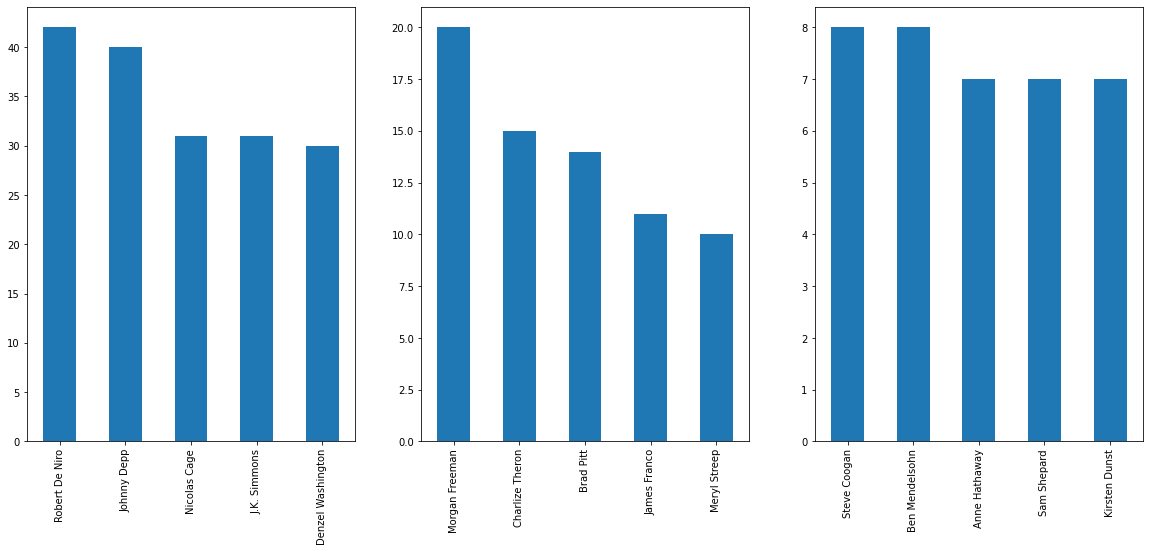

In [56]:
fig, ax = plt.subplots(1,3, figsize = (20,8))
final_df['actor_1_name'].value_counts()[:5].plot(kind = 'bar', ax = ax[0]) # Top 5 Actors Who are doing most amount of movies
final_df['actor_2_name'].value_counts()[:5].plot(kind = 'bar',ax = ax[1]) # Top 5 Actors Who are doing most amount of movies
final_df['actor_3_name'].value_counts()[:5].plot(kind = 'bar',ax = ax[2]) # Top 5 Actors Who are doing most amount of movies


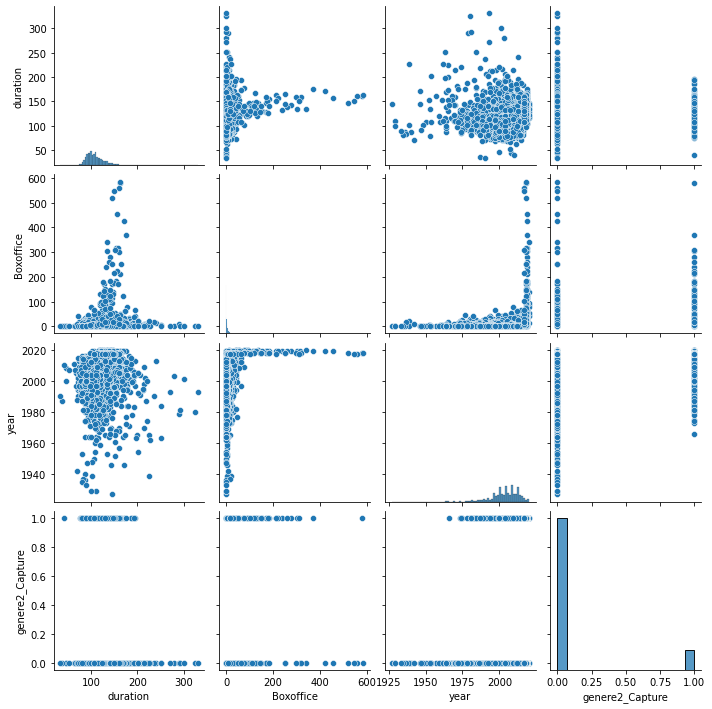

In [57]:
sns.pairplot(final_df)

<AxesSubplot:ylabel='country'>

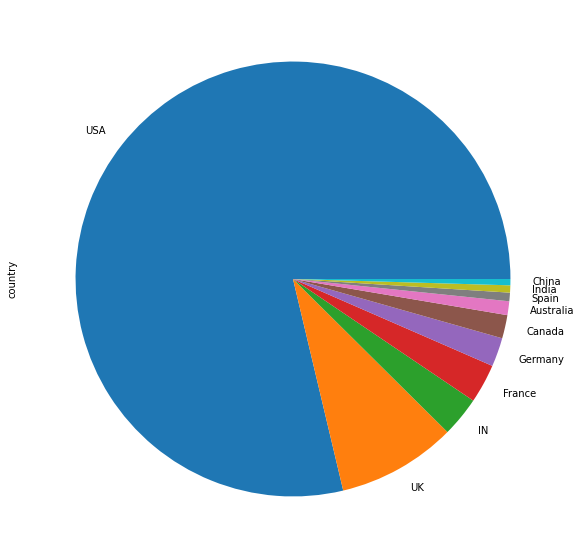

In [58]:
fig = plt.subplots(figsize = (15,10))
final_df.country.value_counts()[:10].plot(kind = 'pie')
# This is only for hollywood dataset. Because india data was also less and it was combined.

In [59]:
# We need to replace India With IN. and later on we will do label encoding in it.

In [60]:
final_df.country.replace({'India': 'IN'},regex=True,inplace = True) # Renaming India To IN
final_df.country.value_counts()

USA               3224
UK                 363
IN                 144
France             119
Germany             88
Canada              71
Australia           42
Spain               26
China               19
Japan               17
Hong Kong           15
Mexico              14
New Zealand         12
Italy               11
Ireland             10
South Korea         10
Denmark              9
Thailand             5
Brazil               5
Norway               4
Russia               4
Iran                 4
Argentina            3
Sweden               3
South Africa         3
Czech Republic       3
Israel               3
Netherlands          3
Poland               2
Iceland              2
Romania              2
Taiwan               2
Greece               2
Hungary              2
Belgium              2
Official site        1
West Germany         1
Georgia              1
Finland              1
Chile                1
Aruba                1
Colombia             1
Peru                 1
New Line   

# Top Countries

([<matplotlib.patches.Wedge at 0x1f2713b2ec0>,
 [Text(-0.9263266011744141, 0.5932276358672597, 'USA'),
  Text(0.7262970596343657, -0.8261310919984036, 'UK'),
  Text(0.9927997711585301, -0.47365453063131413, 'IN'),
  Text(1.0696785928187988, -0.25649114617310714, 'France'),
  Text(1.0972904514217363, -0.07715999752904718, 'Germany')],
 [Text(-0.505269055186044, 0.3235787104730507, '82%'),
  Text(0.39616203252783583, -0.4506169592718564, '9%'),
  Text(0.5415271479046527, -0.2583570167079895, '4%'),
  Text(0.5834610506284357, -0.1399042615489675, '3%'),
  Text(0.5985220644118561, -0.04208727137948027, '2%')])

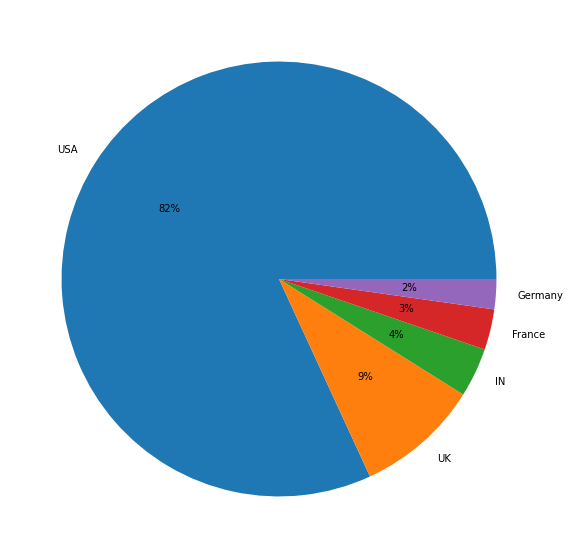

In [61]:
fig = plt.subplots(figsize = (15,10))
plt.pie(final_df['country'].value_counts()[:5],labels = final_df['country'].value_counts().index[:5], autopct='%1.0f%%')

In [62]:
final_df.dtypes

Director            object
duration           float64
actor_2_name        object
Boxoffice          float64
actor_1_name        object
actor_3_name        object
language            object
country             object
year               float64
genere1             object
genere2             object
genere2_Capture      int32
dtype: object

In [63]:
dw.Find_Categorical_col(final_df) # it actually returns all real categorical features.

['duration',
 'year',
 'genere2_Capture',
 'language',
 'country',
 'genere1',
 'genere2']

In [64]:
final_df.actor_3_name.value_counts()

Steve Coogan        8
Ben Mendelsohn      8
Anne Hathaway       7
Sam Shepard         7
Kirsten Dunst       7
                   ..
Caroline Goodall    1
DeVaughn Nixon      1
Clarke Peters       1
Ahney Her           1
 Shreyas Talpade    1
Name: actor_3_name, Length: 2967, dtype: int64

### TAKE TOP 10 VALUES BY COUNT AND THEN ONE HOT ENCODE THEM.
This technique was actually used in one of the kaggle competetion Orange Cup. 

In [65]:
final_df.actor_1_name.value_counts()[:10]

Robert De Niro       42
Johnny Depp          40
Nicolas Cage         31
J.K. Simmons         31
Denzel Washington    30
Matt Damon           29
Bruce Willis         29
Liam Neeson          27
Robin Williams       27
Bill Murray          26
Name: actor_1_name, dtype: int64

# Day 3

# Lets do encoding.

In [66]:
index_main = list(final_df.columns)
index_main.remove('Boxoffice')
X = final_df[index_main]
y = final_df['Boxoffice']

In [67]:
X.columns

Index(['Director', 'duration', 'actor_2_name', 'actor_1_name', 'actor_3_name',
       'language', 'country', 'year', 'genere1', 'genere2', 'genere2_Capture'],
      dtype='object')

# Before doing any encoding its important to do train test split.

In [68]:
# Before doing any encoding its important to do train test split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# One hot encoding for multi category features.

In [102]:
final_df['actor_1_name'].value_counts()[:10]

Robert De Niro       42
Johnny Depp          40
Nicolas Cage         31
J.K. Simmons         31
Denzel Washington    30
Matt Damon           29
Bruce Willis         29
Liam Neeson          27
Robin Williams       27
Bill Murray          26
Name: actor_1_name, dtype: int64

In [69]:
top_10_actor1 = X_train.actor_1_name.value_counts().sort_values(ascending = False).head(10).index
top_10_actor1 = list(top_10_actor1)
for categories in top_10_actor1:
    X_train[categories] = np.where(X_train['actor_1_name'] == categories,1,0)

In [70]:
X_train.head()

,Director,duration,actor_2_name,actor_1_name,actor_3_name,language,country,year,genere1,genere2,...,Robert De Niro,Johnny Depp,J.K. Simmons,Denzel Washington,Nicolas Cage,Liam Neeson,Keanu Reeves,Bruce Willis,Matt Damon,Steve Buscemi
4823,Paul Fierlinger,83.0,Peter Gerety,Isabella Rossellini,Lynn Redgrave,English,USA,2009.0,Animation,Drama,...,0,0,0,0,0,0,0,0,0,0
5087,Punit Malhotra,146.0,Tara Sutaria,Tiger Shroff,Ananya Panday,Hindi,IN,2019.0,Drama,Romance,...,0,0,0,0,0,0,0,0,0,0
1181,M. Night Shyamalan,107.0,Haley Joel Osment,Bruce Willis,Olivia Williams,English,USA,1999.0,Drama,Mystery,...,0,0,0,0,0,0,0,1,0,0
92,Roland Emmerich,120.0,Sela Ward,Vivica A. Fox,Judd Hirsch,English,USA,2016.0,Action,Adventure,...,0,0,0,0,0,0,0,0,0,0
416,John McTiernan,130.0,Tom Noonan,F. Murray Abraham,Joan Plowright,English,USA,1993.0,Action,Adventure,...,0,0,0,0,0,0,0,0,0,0


In [71]:
top_10_actor2 = X_train.actor_2_name.value_counts().sort_values(ascending = False).head(10).index
top_10_actor2 = list(top_10_actor2)
for categories in top_10_actor2:
    X_train[categories] = np.where(X_train['actor_2_name'] == categories,1,0)

In [72]:
top_10_actor3 = X_train.actor_3_name.value_counts().sort_values(ascending = False).head(10).index
top_10_actor3 = list(top_10_actor3)
for categories in top_10_actor3:
    X_train[categories] = np.where(X_train['actor_3_name'] == categories,1,0)

In [73]:
X_train.drop(['actor_2_name','actor_1_name','actor_3_name'], axis = 1, inplace = True)

In [74]:
print(f'{X_train.genere1.value_counts()}\n') # These are not that many and we can use label encoding.
print(X_train.genere2.value_counts()) # These are not that many and we can use label encoding.

Comedy          934
Action          798
Drama           638
Adventure       318
Crime           237
Biography       182
Horror          124
Animation        41
Documentary      39
Fantasy          34
Mystery          20
Thriller          8
Sci-Fi            7
Biographical      6
Romance           5
Musical           4
Historical        3
Western           3
Period            2
Sports            1
Spy               1
Dance             1
Music             1
Social            1
Name: genere1, dtype: int64

Drama          804
Missing        396
Adventure      332
Crime          285
Romance        280
Comedy         249
Mystery        140
Thriller       134
Horror         125
Family         115
Fantasy        101
Animation      101
Sci-Fi          67
Music           58
History         44
Sport           34
Biography       28
Documentary     20
War             19
Musical         17
 Romance        11
Western          9
 Drama           9
 Thriller        7
 Action          7
 Social         

In [75]:
index_genere1 = list(X_train.genere1.unique())
index_genere2 = list(X_train.genere2.unique())

In [76]:
dicti = {} #ordering into dictionaries.
for i in range(len(index_genere1)):
    dicti[index_genere1[i]] = i 

In [77]:
dicti #This is for genere1

{'Animation': 0,
 'Drama': 1,
 'Action': 2,
 'Crime': 3,
 'Documentary': 4,
 'Fantasy': 5,
 'Adventure': 6,
 'Biography': 7,
 'Comedy': 8,
 'Horror': 9,
 'Sci-Fi': 10,
 'Biographical': 11,
 'Historical': 12,
 'Western': 13,
 'Mystery': 14,
 'Musical': 15,
 'Romance': 16,
 'Sports': 17,
 'Thriller': 18,
 'Spy': 19,
 'Period': 20,
 'Dance': 21,
 'Music': 22,
 'Social': 23}

In [78]:
dict2 = {} #ordering into dictionaries.
for i in range(len(index_genere2)):
    dict2[index_genere2[i]] = i 

In [79]:
dict2

{'Drama': 0,
 ' Romance': 1,
 'Mystery': 2,
 'Adventure': 3,
 'Music': 4,
 'Horror': 5,
 'Thriller': 6,
 'Comedy': 7,
 'War': 8,
 'Missing': 9,
 'Crime': 10,
 'History': 11,
 'Romance': 12,
 'Family': 13,
 'Fantasy': 14,
 'Animation': 15,
 'Western': 16,
 'Biography': 17,
 'Sport': 18,
 'Sci-Fi': 19,
 ' Action': 20,
 'Documentary': 21,
 ' Drama': 22,
 'Musical': 23,
 ' Crime': 24,
 ' Thriller': 25,
 ' Social': 26,
 ' Sports': 27,
 ' Adventure': 28,
 ' Comedy': 29,
 ' Musical': 30,
 ' war': 31,
 ' Period': 32,
 ' Horror': 33}

In [80]:
X_train['genere1'] = X_train.genere1.map(dicti)

In [81]:
X_train['genere2'] = X_train.genere2.map(dict2)

In [82]:
#using same technique we will encode our country language

In [83]:
X_train.dtypes

Director               object
duration              float64
language               object
country                object
year                  float64
genere1                 int64
genere2                 int64
genere2_Capture         int32
Robert De Niro          int32
Johnny Depp             int32
J.K. Simmons            int32
Denzel Washington       int32
Nicolas Cage            int32
Liam Neeson             int32
Keanu Reeves            int32
Bruce Willis            int32
Matt Damon              int32
Steve Buscemi           int32
Morgan Freeman          int32
Charlize Theron         int32
Brad Pitt               int32
James Franco            int32
Robert Duvall           int32
Will Ferrell            int32
Thomas Kretschmann      int32
Zooey Deschanel         int32
Jada Pinkett Smith      int32
Steve Coogan            int32
Tom Wilkinson           int32
Stephen Root            int32
Mike Epps               int32
Anne Hathaway           int32
Craig T. Nelson         int32
Steve Care

In [84]:
index = X_train.language.unique()

In [85]:
dict3 = {} #ordering into dictionaries.
for i in range(len(index)):
    dict3[index[i]] = i 

In [86]:
dict3 #Languages mapping.

{'English': 0,
 'Hindi': 1,
 'Mandarin': 2,
 'German': 3,
 'Cantonese': 4,
 'Dutch': 5,
 'Spanish': 6,
 'Russian': 7,
 'French': 8,
 'Hungarian': 9,
 'Japanese': 10,
 'Italian': 11,
 'Swedish': 12,
 'Korean': 13,
 'Thai': 14,
 'Mongolian': 15,
 'Aboriginal': 16,
 'Arabic': 17,
 'Hebrew': 18,
 'Icelandic': 19,
 'Persian': 20,
 'Norwegian': 21,
 'Portuguese': 22,
 'Dari': 23,
 'Vietnamese': 24,
 'Danish': 25,
 'None': 26,
 'Aramaic': 27,
 'Kazakh': 28,
 'Filipino': 29,
 'Romanian': 30,
 'Greek': 31,
 'Chinese': 32,
 'Polish': 33,
 'Maya': 34}

In [87]:
X_train['language'] = X_train.language.map(dict3)

In [88]:
X_train.head()

,Director,duration,language,country,year,genere1,genere2,genere2_Capture,Robert De Niro,Johnny Depp,...,Jada Pinkett Smith,Steve Coogan,Tom Wilkinson,Stephen Root,Mike Epps,Anne Hathaway,Craig T. Nelson,Steve Carell,Kevin Dunn,Sam Shepard
4823,Paul Fierlinger,83.0,0,USA,2009.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5087,Punit Malhotra,146.0,1,IN,2019.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1181,M. Night Shyamalan,107.0,0,USA,1999.0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,Roland Emmerich,120.0,0,USA,2016.0,2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
416,John McTiernan,130.0,0,USA,1993.0,2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# Again Ill be using One hot encoding KDD Cup Techniques.
X_train.Director.value_counts()

Steven Spielberg    20
Woody Allen         17
Clint Eastwood      16
Martin Scorsese     15
Tim Burton          15
                    ..
Gary Hardwick        1
Rick Bieber          1
Vicky Jenson         1
Audrey Wells         1
Max Joseph           1
Name: Director, Length: 1726, dtype: int64

In [90]:
top_10_director = X_train.Director.value_counts().sort_values(ascending = False).head(10).index
top_10_director = list(top_10_director)
for categories in top_10_director:
    X_train['Direct_'+categories] = np.where(X_train['Director'] == categories,1,0)

In [91]:
X_train.drop('Director', axis = 1, inplace= True)

In [92]:
X_train.head()

,duration,language,country,year,genere1,genere2,genere2_Capture,Robert De Niro,Johnny Depp,J.K. Simmons,...,Direct_Steven Spielberg,Direct_Woody Allen,Direct_Clint Eastwood,Direct_Martin Scorsese,Direct_Tim Burton,Direct_Ridley Scott,Direct_Spike Lee,Direct_Michael Bay,Direct_Oliver Stone,Direct_Joel Schumacher
4823,83.0,0,USA,2009.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5087,146.0,1,IN,2019.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1181,107.0,0,USA,1999.0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,120.0,0,USA,2016.0,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
416,130.0,0,USA,1993.0,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
index = X_train.country.unique()
dict4 = {} #ordering into dictionaries.
for i in range(len(index)):
    dict4[index[i]] = i 

In [94]:
dict4

{'USA': 0,
 'IN': 1,
 'Hong Kong': 2,
 'UK': 3,
 'Germany': 4,
 'Australia': 5,
 'Japan': 6,
 'Canada': 7,
 'France': 8,
 'Netherlands': 9,
 'Mexico': 10,
 'Sweden': 11,
 'Ireland': 12,
 'Hungary': 13,
 'Argentina': 14,
 'Spain': 15,
 'Denmark': 16,
 'Italy': 17,
 'South Korea': 18,
 'Chile': 19,
 'Poland': 20,
 'Taiwan': 21,
 'Thailand': 22,
 'Russia': 23,
 'China': 24,
 'Iceland': 25,
 'Aruba': 26,
 'New Line': 27,
 'Iran': 28,
 'Norway': 29,
 'Czech Republic': 30,
 'West Germany': 31,
 'New Zealand': 32,
 'Brazil': 33,
 'South Africa': 34,
 'Colombia': 35,
 'Philippines': 36,
 'Romania': 37,
 'Belgium': 38,
 'Greece': 39,
 'Afghanistan': 40,
 'Georgia': 41,
 'Israel': 42}

In [95]:
X_train['country'] = X_train.country.map(dict4)

In [96]:
X_train.tail()

,duration,language,country,year,genere1,genere2,genere2_Capture,Robert De Niro,Johnny Depp,J.K. Simmons,...,Direct_Steven Spielberg,Direct_Woody Allen,Direct_Clint Eastwood,Direct_Martin Scorsese,Direct_Tim Burton,Direct_Ridley Scott,Direct_Spike Lee,Direct_Michael Bay,Direct_Oliver Stone,Direct_Joel Schumacher
1712,109.0,0,0,2001.0,2,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4275,96.0,0,3,2015.0,1,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3709,93.0,0,0,1991.0,8,14,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
532,125.0,0,0,2004.0,9,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1640,125.0,0,0,1989.0,2,10,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# My assumption of features.
The total no of inputs (i.e. samples) must be at least the square size of the number of features (i.e. n_samples > n_features ** 2 ). But still we can see the feature importance by using ExtraTreesRegressor.

In [97]:
### Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [98]:
print(model.feature_importances_)

[2.54528764e-01 4.97775547e-02 1.96336504e-02 2.95496194e-01
 1.35112395e-01 2.18253301e-01 1.81975407e-02 2.60404762e-04
 4.83715269e-04 4.73977751e-04 1.29629119e-04 1.00753058e-04
 2.59814930e-04 1.13877828e-04 2.66749641e-04 2.10469318e-04
 4.53393480e-05 1.40925038e-04 2.19604892e-04 7.32288410e-05
 8.93006862e-04 3.22961823e-05 2.02786479e-04 2.14183926e-04
 1.02668638e-04 8.72059887e-05 6.45607603e-04 8.36164997e-05
 1.95161563e-05 1.95968317e-04 4.36778356e-04 6.83679788e-05
 1.01651512e-04 1.53235753e-04 5.81176837e-05 7.52739825e-04
 7.54415862e-05 3.58391886e-04 9.87756007e-05 3.90976363e-04
 2.85306640e-04 1.65683945e-04 5.86145925e-04 1.30410406e-04
 8.32306377e-05]


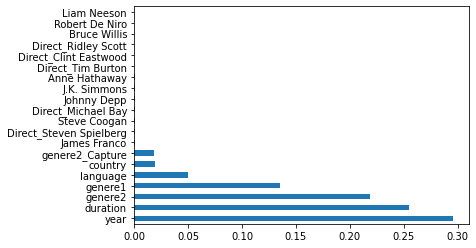

In [106]:
#Plotting most important features.
feat_importances = pd.Series(model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(20).plot(kind = 'barh')
plt.show()

***When we examine the chart above, it’s clear that not even one dummy variable is featured in the top 20 which validates our hypothesis of variable selection for splitting. One-hot encoding has also obscured the order of importance of features that weren’t involved in the encoding and this makes the model inefficient if we use tree based algorithms.***

# Now We will do feature engineering for test dataset also.